In [130]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [131]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [132]:
import pandas as pd

In [134]:
# importing the pandas library
import pandas as pd

# reading the csv file
df = pd.read_csv('mr/IMDB_Dataset.csv')

# updating the column value/data
df['sentiment'] = df['sentiment'].replace({'negative': 0})

# writing into the file
df.to_csv('mr/IMDB_Dataset.csv', index=False)

print(df)


                                                  review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]


In [135]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/IMDB_Dataset.csv')
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-imdb.csv', index=False)
test.to_csv('test-imdb.csv', index=False)

In [136]:
train_df = pd.read_csv("train-imdb.csv", encoding='unicode_escape', header=0)

In [137]:
train_df

,review,sentiment
0,This is the most ludicrous and laughable thril...,0
1,"John Knowles modern masterpiece, A Separate Pe...",0
2,"I was literally preparing to hate this movie, ...",1
3,I really enjoyed this movie. Typically Ron How...,1
4,I found this movie to be preachy and unrealist...,0
...,...,...
44995,Apparently SHRUNKEN HEADS was the last movie t...,0
44996,I must have seen this a dozen times over the y...,1
44997,If you want to watch a real 'quality' movie ge...,0
44998,My children watch the show everyday that its o...,0


In [138]:
train_df.iloc[0][1]

0

In [139]:
test_df = pd.read_csv("test-imdb.csv", encoding='unicode_escape', header=0)

In [140]:
test_df.shape

(5000, 2)

In [141]:
test_df.head()

,review,sentiment
0,A wonderful little production. <br /><br />The...,1
1,This a fantastic movie of three prisoners who ...,1
2,Some films just simply should not be remade. T...,1
3,"Taut and organically gripping, Edward Dmytryk'...",1
4,"""Ardh Satya"" is one of the finest film ever ma...",1


In [142]:
test_df

,review,sentiment
0,A wonderful little production. <br /><br />The...,1
1,This a fantastic movie of three prisoners who ...,1
2,Some films just simply should not be remade. T...,1
3,"Taut and organically gripping, Edward Dmytryk'...",1
4,"""Ardh Satya"" is one of the finest film ever ma...",1
...,...,...
4995,This is John Waters best film to date. The cha...,1
4996,"Yeah, I guess this movie is kinda dull compare...",1
4997,"It is the early morning of our discontent, and...",0
4998,Imaginary Heroes is clearly the best film of t...,1


In [143]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,0,This is the most ludicrous and laughable thril...
1,1,0,"John Knowles modern masterpiece, A Separate Pe..."
2,2,1,"I was literally preparing to hate this movie, ..."
3,3,1,I really enjoyed this movie. Typically Ron How...
4,4,0,I found this movie to be preachy and unrealist...


In [144]:
train_df_bert

,id,label,sentence
0,0,0,This is the most ludicrous and laughable thril...
1,1,0,"John Knowles modern masterpiece, A Separate Pe..."
2,2,1,"I was literally preparing to hate this movie, ..."
3,3,1,I really enjoyed this movie. Typically Ron How...
4,4,0,I found this movie to be preachy and unrealist...
...,...,...,...
44995,44995,0,Apparently SHRUNKEN HEADS was the last movie t...
44996,44996,1,I must have seen this a dozen times over the y...
44997,44997,0,If you want to watch a real 'quality' movie ge...
44998,44998,0,My children watch the show everyday that its o...


In [145]:
train_df_bert = train_df_bert.iloc[0:10000]

In [146]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,A wonderful little production. <br /><br />The...
1,1,1,This a fantastic movie of three prisoners who ...
2,2,1,Some films just simply should not be remade. T...
3,3,1,"Taut and organically gripping, Edward Dmytryk'..."
4,4,1,"""Ardh Satya"" is one of the finest film ever ma..."


In [147]:
test_df_bert = test_df_bert.iloc[0:3000]

In [148]:
test_df_bert

,id,label,sentence
0,0,1,A wonderful little production. <br /><br />The...
1,1,1,This a fantastic movie of three prisoners who ...
2,2,1,Some films just simply should not be remade. T...
3,3,1,"Taut and organically gripping, Edward Dmytryk'..."
4,4,1,"""Ardh Satya"" is one of the finest film ever ma..."
...,...,...,...
2995,2995,1,This film starts out with all the moody promis...
2996,2996,0,Naach would have won an Razzie for the Worst F...
2997,2997,0,"I won't describe the story, as that has been d..."
2998,2998,1,"Quirky, vulnerable, raw, honest and a treat to..."


In [149]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [150]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [151]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [152]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  John Knowles modern masterpiece, A Separate Peace, are one of many subtle, and subtly is the watch word, themes of love, hate, jealously, denial and regret. The 1972 version does attempt to address this style and what the book is - A love story with war looming in the background. <br /><br />The 2004 version does not use subtly at all but overtness in the portrayal of the story. What is staring you in the face when you read the novel - is a love story, and yes maybe it is arguable, a gay love story. In the novel and 1972 film version there are sexual undertones everywhere in the writings and dialog.In the 2004 Showtime film version these tensions were omitted and the actors were in there late twenties playing teenagers which caused for mature acting taking away from any tenderness or hesitation of innocence in youth.<br /><br />I did not like this remake for more reasons. The hair that broke the camels' back was that Phineas was given a surname on the letters he received fr

In [153]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:
    #sent=str(sent)

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  231


In [154]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:
    #sent=str(sent)

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  207


In [155]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    #sent=str(sent)
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  This is the most ludicrous and laughable thriller I've ever seen. Oh....where to start....<br /><br />Plot (what little there is): Clayton Beresford Jr. (Hayden Christensen), a young billionaire, with a bad heart is desperately in need of a transplant. Clay has been secretly engaged to his mother's PA, Samantha, played by Jessica Alba. On the night that these two secretly get married, it just so happens that a heart donor with the same rare blood type is found. Go and figure the odds of that one! Once on the operating table, Clay finds out the anesthesia isn't working, and he can feel everything and hear everything.<br /><br />Fortunately Clay seems to be able to filter out the pain of a razor sharp scalpel cutting open his chest by simply concentrating on his memories of Samantha, which we are told he's doing through an annoying voice-over which never seems to stop.<br /><br />If you didn't burst out in laughter yet, you will surely start to when you see the surgical scenes

In [156]:

train_df_bert.head()

,id,label,sentence
0,0,0,This is the most ludicrous and laughable thril...
1,1,0,"John Knowles modern masterpiece, A Separate Pe..."
2,2,1,"I was literally preparing to hate this movie, ..."
3,3,1,I really enjoyed this movie. Typically Ron How...
4,4,0,I found this movie to be preachy and unrealist...


In [157]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [158]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [159]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (3000, 60)


In [160]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [161]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [162]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
filters = 32
kernel_size = 3
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))

model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
dropout_63 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
dropout_64 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
dropout_65 (Dropout)         (None, 60,

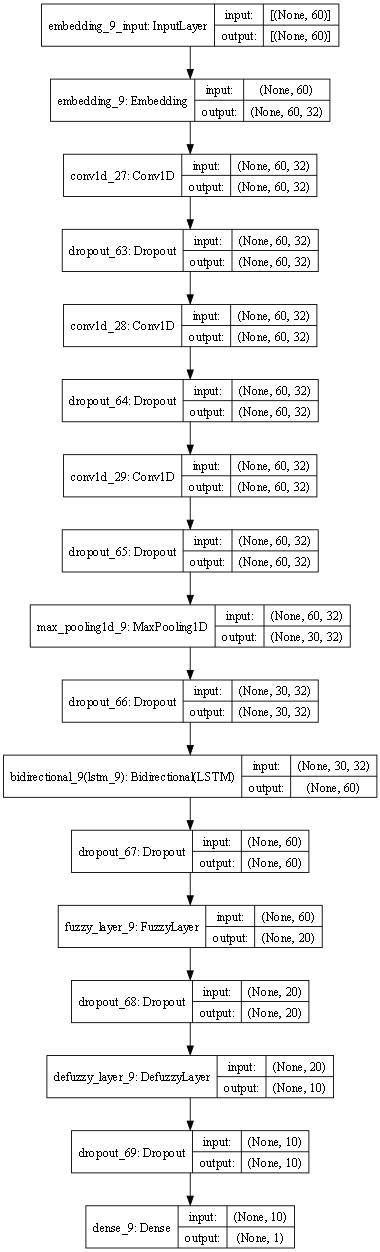

In [163]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [164]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 14s 13ms/step - loss: 0.6298 - accuracy: 0.6111 - val_loss: 0.5320 - val_accuracy: 0.7410
Epoch 2/20
900/900 [==============================] - 12s 13ms/step - loss: 0.4359 - accuracy: 0.8030 - val_loss: 0.4465 - val_accuracy: 0.7910
Epoch 3/20
900/900 [==============================] - 11s 13ms/step - loss: 0.3507 - accuracy: 0.8572 - val_loss: 0.4754 - val_accuracy: 0.7930
Epoch 4/20
900/900 [==============================] - 12s 13ms/step - loss: 0.2997 - accuracy: 0.8774 - val_loss: 0.5025 - val_accuracy: 0.7880
Epoch 5/20
313/313 [==============================] - 3s 6ms/step - loss: 0.2032 - accuracy: 0.9309
Training Accuracy: 0.930900
Training Loss: 0.203246
94/94 [==============================] - 1s 6ms/step - loss: 0.5057 - accuracy: 0.8020
Testing Accuracy:  0.802000
Testing Loss:  0.505657


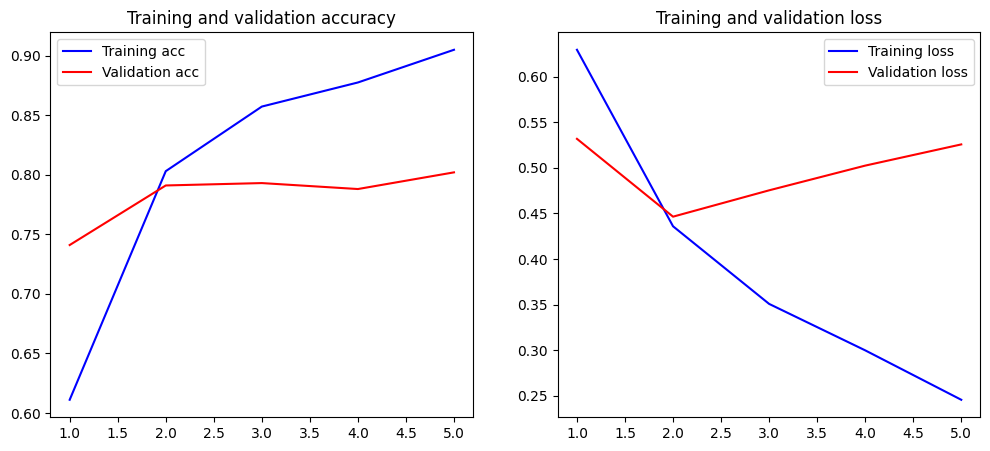

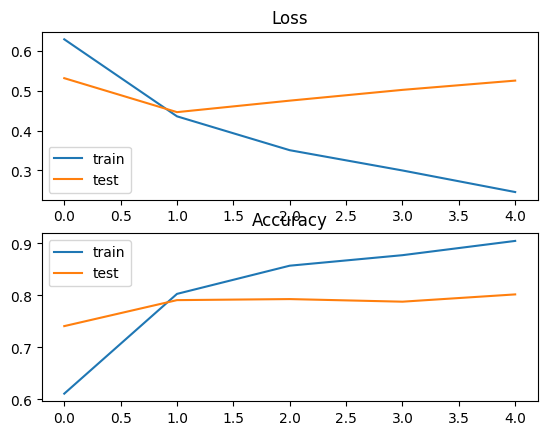

In [165]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()